In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [2]:
train_dataset = dsets.MNIST(root = './data',
                            train = True,
                            transform = transforms.ToTensor(),
                            download = True)

Processing...
Done!


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

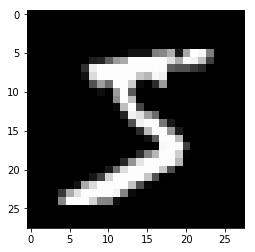

In [5]:
img = train_dataset[0][0].numpy().reshape(28,28)
plt.imshow(img, cmap = 'gray')

In [6]:
test_dataset = dsets.MNIST(root = './data',
                            train = False,
                            transform = transforms.ToTensor(),
                            download = True)

In [7]:
batch_size = 100
n_iter = 3000

In [10]:
n_epochs = n_iter/(len(train_dataset)/batch_size)
n_epochs = int(n_epochs)

In [11]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

In [12]:
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = batch_size,
                                          shuffle = False)

In [13]:
class LogisticRegressionModel(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self). __init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [14]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

In [15]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [17]:
iter = 0
for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
    
        #load images and labels into Variable
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        #clear gradients
        optimizer.zero_grad()
        
        #forward pass to get output values 
        outputs = model(images)
        
        #calculate loss
        loss = criterion(outputs, labels)
        
        #get gradients for the parameters
        loss.backward()
        
        #update parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            
            correct = 0
            total = 0
            
            #iterate through test set
            for images, labels in test_loader:
                
                images = Variable(images.view(-1, 28*28))
                
                #forward pass only to get output values
                outputs = model(images)
                
                #get predicted class
                _, predicted = torch.max(outputs.data, 1)
                
                #update the total
                total += labels.size(0)
                
                #update the number of correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / total
            
            #print loss and accuracy
            print('Iteration: {} Loss: {} Accuracy: {}'.format(iter, loss.data, accuracy))
            

Iteration: 500 Loss: 1.5697534084320068 Accuracy: 76
Iteration: 1000 Loss: 1.4327077865600586 Accuracy: 78
Iteration: 1500 Loss: 1.121614933013916 Accuracy: 80
Iteration: 2000 Loss: 1.1336843967437744 Accuracy: 81
Iteration: 2500 Loss: 0.9262619614601135 Accuracy: 82
Iteration: 3000 Loss: 1.0539007186889648 Accuracy: 83
